## For Uncropped Images - can also do for cropped, but it will make the other pixels outside the test tube equal to 0

### Import, Crop, Resize, Greyscale, Flatten Images

In [201]:
import os
import numpy as np
import pandas as pd
from PIL import Image

df = pd.DataFrame(columns=['file_name', 'pixels'])

path = '/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/All/imgs'
# path = '/Users/almgacis/Documents/MSU/CMSE_890/Final_Project/Cropped 1/imgs_uncropped'
for i, file_name in enumerate(os.listdir(path)):
    
    if not file_name.endswith('.jpg'):
        continue
    
    image_path = os.path.join(path, file_name)
    try:
        image = Image.open(image_path)
    except:
        print(f"Failed to open image {image_path}")
        continue


    if hasattr(image, '_getexif'):  # only for JPEGs
        exifdata = image._getexif()
        if exifdata is not None:
            orientation = exifdata.get(274, None)
            if orientation is not None:
                if orientation == 3:
                    image = image.rotate(180, expand=True)
                elif orientation == 6:
                    image = image.rotate(270, expand=True)
                elif orientation == 8:
                    image = image.rotate(90, expand=True)

                    
    width, height = image.size
    if width > height:
        left = (width - height) / 2 + (height - 800) / 2
        upper = (height - 1350) / 2
        right = (width + height) / 2 - (height - 800) / 2
        lower = (height + 1200) / 2
    else:
        left = (width - 800) / 2
        upper = (height - width) / 2 + (width - 1350) / 2
        right = (width + 800) / 2
        lower = (height + width) / 2 - (width - 1200) / 2
    cropped_image = image.crop((left, upper, right, lower))


    resized_image = cropped_image.resize((150, 150)).convert('L')
    flattened_image = np.array(resized_image).ravel()
    df.loc[i, 'file_name'] = file_name
    df.loc[i, 'pixels'] = flattened_image

df['file_name'] = df['file_name'].str.replace('.jpg', '')
df['file_name'] = 'file_' + df['file_name'].astype(str)

/var/folders/0j/9q772dp50970050p1cw28jy00000gn/T/ipykernel_28986/4136439539.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  df['file_name'] = df['file_name'].str.replace('.jpg', '')


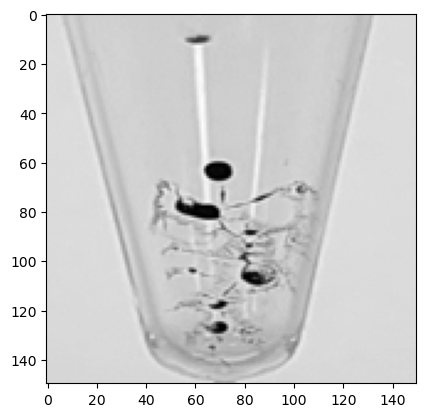

In [24]:
import matplotlib.pyplot as plt

image_array2 = df.loc[18, 'pixels'].reshape((150, 150))

plt.imshow(image_array2, cmap='gray')
plt.show()


In [203]:
df

,file_name,pixels
0,file_63,"[172, 170, 171, 172, 173, 172, 172, 174, 175, ..."
1,file_77,"[186, 185, 186, 186, 186, 186, 187, 186, 186, ..."
2,file_88,"[180, 181, 183, 182, 175, 171, 167, 168, 168, ..."
3,file_89,"[167, 165, 163, 161, 164, 164, 161, 160, 162, ..."
4,file_76,"[164, 163, 158, 145, 143, 144, 134, 141, 158, ..."
...,...,...
116,file_90,"[172, 173, 173, 173, 173, 172, 172, 173, 173, ..."
117,file_91,"[186, 187, 189, 190, 182, 178, 170, 154, 143, ..."
118,file_85,"[182, 180, 180, 180, 179, 180, 179, 180, 182, ..."
119,file_52,"[189, 189, 189, 189, 189, 189, 189, 189, 189, ..."


## Split array to pairwise pixel values per column

In [25]:
columns = [f'pixel_{i}_{j}' for i in range(150) for j in range(150)]

image_df = pd.DataFrame(index=range(df.shape[0]), columns=columns)

for i, row in df.iterrows():
    image_df.loc[i, :] = row['pixels']

image_data = pd.merge(df, image_df, left_index=True, right_index=True)
image_data.drop(columns=['pixels'], inplace=True)
image_data

,file_name,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_0_8,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
0,file_63,172,170,171,172,173,172,172,174,175,...,176,175,175,175,175,176,176,176,176,175
1,file_77,186,185,186,186,186,186,187,186,186,...,170,171,171,170,170,171,171,171,171,171
2,file_88,180,181,183,182,175,171,167,168,168,...,168,168,167,167,168,168,167,167,167,167
3,file_89,167,165,163,161,164,164,161,160,162,...,161,161,161,160,161,161,161,162,161,161
4,file_76,164,163,158,145,143,144,134,141,158,...,175,176,177,176,175,175,175,175,176,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,file_90,172,173,173,173,173,172,172,173,173,...,160,159,160,162,160,162,162,161,160,160
117,file_91,186,187,189,190,182,178,170,154,143,...,175,173,175,175,175,174,174,174,174,175
118,file_85,182,180,180,180,179,180,179,180,182,...,167,167,167,166,167,167,167,166,167,166
119,file_52,189,189,189,189,189,189,189,189,189,...,178,177,179,178,178,178,180,179,178,179


In [205]:
image_data.shape

(120, 22501)

## Attach and position attributes

In [26]:
atts = pd.read_csv('/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/attributes_5andup.csv')
atts

,file_name,Cells,Label
0,file_1,10000000,1
1,file_2,10000000,1
2,file_3,10000000,1
3,file_4,1000000,1
4,file_5,1000000,1
...,...,...,...
115,file_131,0,0
116,file_132,0,0
117,file_133,0,0
118,file_134,0,0


In [27]:
atts['Cells'].unique()

array([10000000,  1000000,   100000,        0])

In [28]:
image_data2 = pd.merge(image_data, atts, on='file_name')

cols = list(image_data2.columns)
cols.pop(cols.index('Cells'))
cols.insert(1, 'Cells')
image_data3 = image_data2.reindex(columns=cols)

cols = list(image_data3.columns)
cols.pop(cols.index('Label'))
cols.insert(2, 'Label')
full_data = image_data3.reindex(columns=cols)

# cols = list(image_data4.columns)
# cols.pop(cols.index('Type'))
# cols.insert(3, 'Type')
# full_data = image_data4.reindex(columns=cols)

# full_data.sort_values(by=['Label'], ascending=[False], inplace=True)
full_data

,file_name,Cells,Label,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
0,file_63,0,0,172,170,171,172,173,172,172,...,176,175,175,175,175,176,176,176,176,175
1,file_77,10000000,1,186,185,186,186,186,186,187,...,170,171,171,170,170,171,171,171,171,171
2,file_88,100000,1,180,181,183,182,175,171,167,...,168,168,167,167,168,168,167,167,167,167
3,file_89,100000,1,167,165,163,161,164,164,161,...,161,161,161,160,161,161,161,162,161,161
4,file_76,10000000,1,164,163,158,145,143,144,134,...,175,176,177,176,175,175,175,175,176,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,file_90,100000,1,172,173,173,173,173,172,172,...,160,159,160,162,160,162,162,161,160,160
116,file_91,0,0,186,187,189,190,182,178,170,...,175,173,175,175,175,174,174,174,174,175
117,file_85,1000000,1,182,180,180,180,179,180,179,...,167,167,167,166,167,167,167,166,167,166
118,file_52,100000,1,189,189,189,189,189,189,189,...,178,177,179,178,178,178,180,179,178,179


In [209]:
full_data.shape

(120, 22503)

In [210]:
full_data.to_csv("/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/All/image_data.csv", index=False)

____
# MACHINE LEARNING

In [211]:
# full_data.reset_index
# full_data

In [29]:
X_in, y_in = full_data.iloc[:, 3:], full_data.iloc[:, 2:3]
X_in.shape, y_in.shape

((120, 22500), (120, 1))

In [213]:
y_in

,Label
0,0
1,1
2,1
3,1
4,1
...,...
115,1
116,0
117,1
118,1


In [214]:
X_in

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_0_8,pixel_0_9,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
0,172,170,171,172,173,172,172,174,175,173,...,176,175,175,175,175,176,176,176,176,175
1,186,185,186,186,186,186,187,186,186,187,...,170,171,171,170,170,171,171,171,171,171
2,180,181,183,182,175,171,167,168,168,167,...,168,168,167,167,168,168,167,167,167,167
3,167,165,163,161,164,164,161,160,162,164,...,161,161,161,160,161,161,161,162,161,161
4,164,163,158,145,143,144,134,141,158,164,...,175,176,177,176,175,175,175,175,176,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,172,173,173,173,173,172,172,173,173,171,...,160,159,160,162,160,162,162,161,160,160
116,186,187,189,190,182,178,170,154,143,144,...,175,173,175,175,175,174,174,174,174,175
117,182,180,180,180,179,180,179,180,182,178,...,167,167,167,166,167,167,167,166,167,166
118,189,189,189,189,189,189,189,189,189,189,...,178,177,179,178,178,178,180,179,178,179


In [30]:
X_in.iloc[:, 1:].values.astype(float)

array([[170., 171., 172., ..., 176., 176., 175.],
       [185., 186., 186., ..., 171., 171., 171.],
       [181., 183., 182., ..., 167., 167., 167.],
       ...,
       [180., 180., 180., ..., 166., 167., 166.],
       [189., 189., 189., ..., 179., 178., 179.],
       [161., 159., 157., ..., 185., 186., 185.]])

In [31]:
X_in.shape, y_in.shape

((120, 22500), (120, 1))

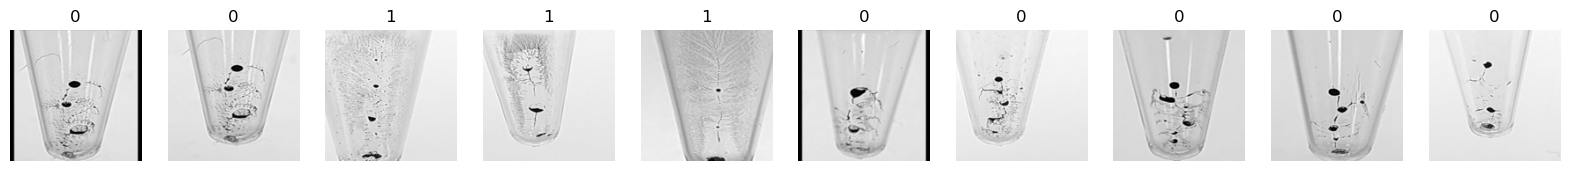

In [32]:
import random
import matplotlib.pyplot as plt

seed = 42
random.seed(seed)
random_digits = random.sample(range(0, len(X_in)), 10)

fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i, j in enumerate(random_digits):
    image_array = X_in.iloc[j, :].values.astype(float).reshape((150, 150))
    ax[i].imshow(image_array, cmap='gray')
    ax[i].set_title(y_in.iloc[j,0])
    ax[i].axis('off')

plt.show()

> ✅ show upper part

## 🦠 Dimensionality Reduction

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_in)
n_components = pca.n_components_
print("Number of components to preserve 95% variance:", n_components)

Number of components to preserve 95% variance: 28


In [36]:
# set number of components you want to keep after PCA
n_components = 28

# create a PCA object and fit_transform the image data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_in)

# create a new DataFrame with the PCA components
columns = [f'PCA_{i}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=columns)

# merge the PCA components with the labels and cell counts
pca_data = pd.concat([y_in, X_pca_df], axis=1)

pca_data


,Label,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,...,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27
0,0,-2633.434371,-1177.085767,252.072383,-763.504996,239.711541,-551.957037,-356.289498,-79.876031,-57.845362,...,47.479703,-73.813281,-196.178727,-114.007776,-132.648780,162.424360,-15.747504,-118.010357,91.314643,-15.097494
1,1,-2283.366866,-1255.849409,-260.662840,262.806202,-176.347558,56.360886,-70.167010,-128.615147,-542.937866,...,-100.335991,-40.252062,-73.483790,48.654197,108.221661,-109.443266,-157.151592,22.537742,-76.054625,197.405016
2,1,-1585.266652,-1337.546761,310.762524,-268.827591,-309.927693,594.932663,164.108345,-99.978314,-57.819232,...,142.505944,176.838296,-273.484146,327.991287,-42.376154,-6.712560,-48.083979,43.314417,-92.880175,-149.856063
3,1,-455.957290,-1369.880955,316.513993,-666.245048,-216.524890,487.931244,-211.336128,-36.048651,-583.238125,...,136.015560,323.157862,-163.772089,-3.248937,114.597139,-302.092129,155.580997,-100.968956,-82.237800,-345.702890
4,1,-2398.249281,-1348.961222,499.928218,-242.096815,-81.195976,-105.525936,168.448255,-50.263262,-515.256653,...,2.959226,322.798974,210.623642,173.208465,-8.858661,180.889690,-39.718011,-264.375021,226.727564,-309.167906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,-611.701984,-1357.544393,268.546029,-610.869606,-462.236693,567.280872,-151.756906,-38.002606,-658.542927,...,150.472111,161.969803,-27.819936,-29.107431,117.612209,-245.836919,158.596827,-152.719543,-83.444251,-195.734294
116,0,-2931.327272,-1153.137980,-142.407406,-968.526768,158.998255,-221.811385,92.160619,236.616914,88.423331,...,-42.325117,202.621507,191.196654,-212.958560,72.611586,248.437468,65.793724,3.726354,239.806597,44.976236
117,1,-1548.522663,-1349.636125,-72.365414,-231.091813,336.086833,509.130803,11.180819,-353.062193,345.140400,...,237.044526,29.118157,48.630730,5.742487,-122.542813,225.793098,253.133647,-39.685680,-39.895562,-275.038280
118,1,-2199.461138,-1324.531225,-1307.454325,184.837768,-103.997410,-190.529168,103.679849,-307.810317,-307.049714,...,70.220427,-289.731393,-215.549442,347.250905,-66.494511,274.990281,-126.741215,465.854787,-224.821555,168.135208


In [39]:
X_in, y_in = pca_data.iloc[:, 1:], pca_data.iloc[:, :1]
X_in, y_in

(           PCA_0        PCA_1        PCA_2       PCA_3       PCA_4  \
 0   -2633.434371 -1177.085767   252.072383 -763.504996  239.711541   
 1   -2283.366866 -1255.849409  -260.662840  262.806202 -176.347558   
 2   -1585.266652 -1337.546761   310.762524 -268.827591 -309.927693   
 3    -455.957290 -1369.880955   316.513993 -666.245048 -216.524890   
 4   -2398.249281 -1348.961222   499.928218 -242.096815  -81.195976   
 ..           ...          ...          ...         ...         ...   
 115  -611.701984 -1357.544393   268.546029 -610.869606 -462.236693   
 116 -2931.327272 -1153.137980  -142.407406 -968.526768  158.998255   
 117 -1548.522663 -1349.636125   -72.365414 -231.091813  336.086833   
 118 -2199.461138 -1324.531225 -1307.454325  184.837768 -103.997410   
 119 -2822.679850 -1251.300634   626.984751   75.596313  232.891069   
 
           PCA_5       PCA_6       PCA_7       PCA_8       PCA_9  ...  \
 0   -551.957037 -356.289498  -79.876031  -57.845362 -175.993329  ...   


## 🦠 Model Selection

### 📍 Binary Classification - ⭐️ Logistic, Random Forest, and KNN Classifiers --> increase recall

In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y = y_in.to_numpy()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=42)

classifiers = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier()] 

results = {'Accuracy':[], 'Precision':[], 'Recall':[], 'AUC':[]}

for clf in classifiers:
    clf.fit(X_train, y_train)
    
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    cv_acc = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    overall_acc = np.mean(cv_acc)
    
    results['Accuracy'].append(overall_acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['AUC'].append(auc_score)
    
    print(type(clf).__name__)
    print('Precision:', precision)
    print('Recall:', recall)
    print('AUC:', auc_score)
    print('Cross-validated Accuracies:', cv_acc)
    print('Overall Accuracy:', overall_acc)
    print('-' * 40)


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

LogisticRegression
Precision: 0.8235294117647058
Recall: 0.875
AUC: 0.8546874999999999
Cross-validated Accuracies: [0.70588235 0.82352941 0.70588235 0.76470588 0.875     ]
Overall Accuracy: 0.775
----------------------------------------
RandomForestClassifier
Precision: 0.7894736842105263
Recall: 0.9375
AUC: 0.9109375000000001
Cross-validated Accuracies: [0.70588235 0.88235294 0.82352941 0.88235294 0.875     ]
Overall Accuracy: 0.8338235294117649
----------------------------------------
GradientBoostingClassifier
Precision: 0.7647058823529411
Recall: 0.8125
AUC: 0.909375
Cross-validated Accuracies: [0.58823529 0.76470588 0.82352941 0.64705882 0.8125    ]
Overall Accuracy: 0.7272058823529413
----------------------------------------
KNeighborsClassifier
Precision: 0.8666666666666667
Recall: 0.8125
AUC: 0.909375
Cross-validated Accuracies: [0.76470588 0.82352941 0.76470588 0.88235294 0.75      ]
Overall Accuracy: 0.7970588235294117
----------------------------------------


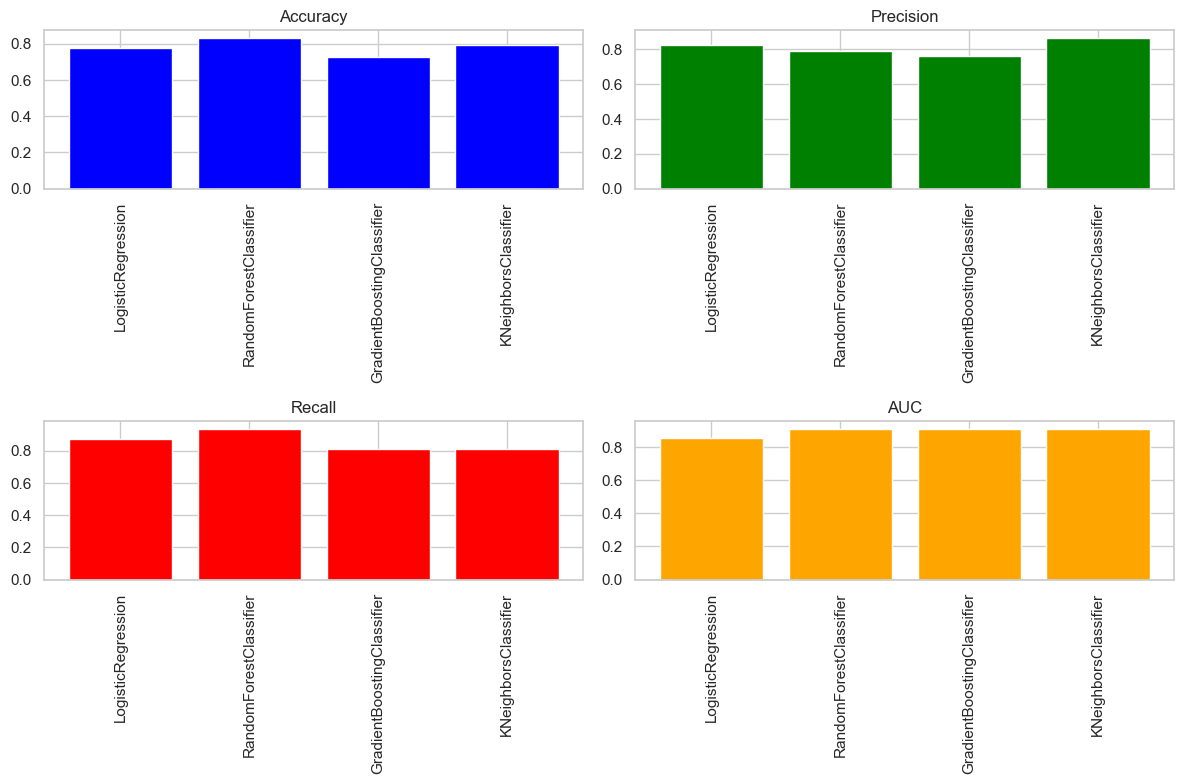

In [56]:
import matplotlib.pyplot as plt

# Plotting accuracy, precision, recall, and AUC scores as bar plots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].bar(range(len(classifiers)), results['Accuracy'], color='blue')
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_xticks(range(len(classifiers)))
ax[0, 0].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

ax[0, 1].bar(range(len(classifiers)), results['Precision'], color='green')
ax[0, 1].set_title('Precision')
ax[0, 1].set_xticks(range(len(classifiers)))
ax[0, 1].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

ax[1, 0].bar(range(len(classifiers)), results['Recall'], color='red')
ax[1, 0].set_title('Recall')
ax[1, 0].set_xticks(range(len(classifiers)))
ax[1, 0].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

ax[1, 1].bar(range(len(classifiers)), results['AUC'], color='orange')
ax[1, 1].set_title('AUC')
ax[1, 1].set_xticks(range(len(classifiers)))
ax[1, 1].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

plt.tight_layout()
plt.show()


### 📍 Multi-Class Classification

In [59]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

y_mc = full_data.iloc[:, 1:2]
y = y_mc.astype('category')

X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=42)

classifiers = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier()]

results = {'Accuracy':[], 'Precision':[], 'Recall':[], 'AUC':[]}

for clf in classifiers:
    clf.fit(X_train, y_train)
    
    y_pred_prob = clf.predict_proba(X_test)

    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_score = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    
    cv_acc = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    overall_acc = np.mean(cv_acc)
    
    results['Accuracy'].append(overall_acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['AUC'].append(auc_score)
    
    print(type(clf).__name__)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print('AUC:', auc_score)
    print('Cross-validated Accuracies:', cv_acc)
    print('Overall Accuracy:', overall_acc)
    print('-' * 40)


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d 

LogisticRegression
Accuracy: 0.5833333333333334
Precision: 0.6416666666666667
Recall: 0.5833333333333334
F1-score: 0.6047826538022617
AUC: 0.8116907607478728
Cross-validated Accuracies: [0.35294118 0.52941176 0.35294118 0.47058824 0.6875    ]
Overall Accuracy: 0.4786764705882353
----------------------------------------


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/pyth

RandomForestClassifier
Accuracy: 0.5833333333333334
Precision: 0.5445402298850575
Recall: 0.5833333333333334
F1-score: 0.5157155454774502
AUC: 0.8275312196783102
Cross-validated Accuracies: [0.52941176 0.64705882 0.52941176 0.58823529 0.5625    ]
Overall Accuracy: 0.5713235294117648
----------------------------------------


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vecto

GradientBoostingClassifier
Accuracy: 0.6944444444444444
Precision: 0.6478260869565218
Recall: 0.6944444444444444
F1-score: 0.6668819982773472
AUC: 0.8292501290615515
Cross-validated Accuracies: [0.58823529 0.70588235 0.58823529 0.58823529 0.5625    ]
Overall Accuracy: 0.6066176470588236
----------------------------------------
KNeighborsClassifier
Accuracy: 0.6388888888888888
Precision: 0.6083333333333333
Recall: 0.6388888888888888
F1-score: 0.6027777777777777
AUC: 0.7911508480743396
Cross-validated Accuracies: [0.58823529 0.70588235 0.52941176 0.52941176 0.5625    ]
Overall Accuracy: 0.5830882352941177
----------------------------------------


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversi

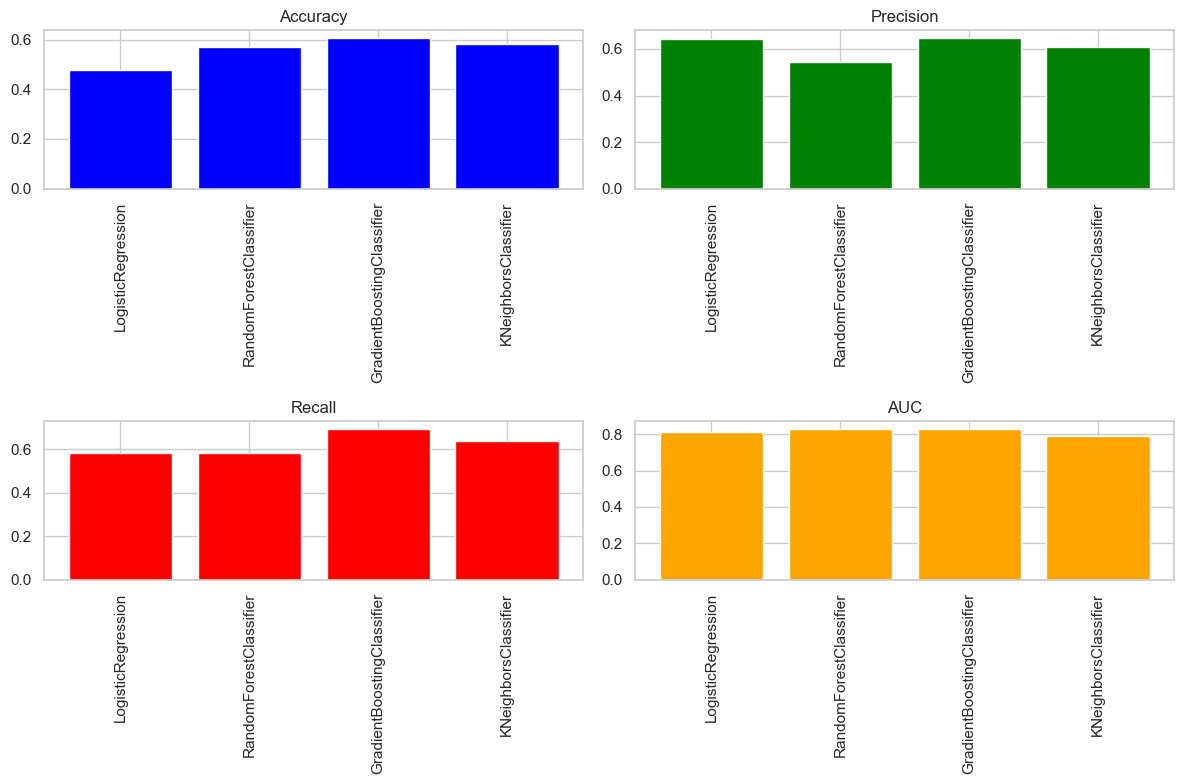

In [60]:
import matplotlib.pyplot as plt

# Plotting accuracy, precision, recall, and AUC scores as bar plots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].bar(range(len(classifiers)), results['Accuracy'], color='blue')
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_xticks(range(len(classifiers)))
ax[0, 0].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

ax[0, 1].bar(range(len(classifiers)), results['Precision'], color='green')
ax[0, 1].set_title('Precision')
ax[0, 1].set_xticks(range(len(classifiers)))
ax[0, 1].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

ax[1, 0].bar(range(len(classifiers)), results['Recall'], color='red')
ax[1, 0].set_title('Recall')
ax[1, 0].set_xticks(range(len(classifiers)))
ax[1, 0].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

ax[1, 1].bar(range(len(classifiers)), results['AUC'], color='orange')
ax[1, 1].set_title('AUC')
ax[1, 1].set_xticks(range(len(classifiers)))
ax[1, 1].set_xticklabels([type(clf).__name__ for clf in classifiers], rotation=90)

plt.tight_layout()
plt.show()

### 📍 Regression - ⭐️ Random Forest Regressor

> try log

In [64]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import math
import pandas as pd

y_reg = full_data.iloc[:, 1:2]
y_reg['Cells'] = pd.to_numeric(y_reg['Cells'], errors='coerce')
y_reg['Cells'] = y_reg['Cells'].fillna(0)
y_reg['Cells'] = y_reg['Cells'].apply(lambda x: 0 if x == 0 else math.log(x))

y = y_reg.to_numpy()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=123)

regressors = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), KNeighborsRegressor()]

results = {'MSE':[], 'MAE':[], 'R2':[]}

for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)
    
    print(type(reg).__name__)
    print('MSE:', mse)
    print('MAE:', mae)
    print('R2:', r2)
    print('-' * 40)


LinearRegression
MSE: 26.197782246279033
MAE: 4.084381238117573
R2: 0.4803371106901567
----------------------------------------
RandomForestRegressor
MSE: 29.616108295237318
MAE: 4.2469902826334645
R2: 0.41253071492331395
----------------------------------------
GradientBoostingRegressor
MSE: 36.518927126290514
MAE: 4.088391897019848
R2: 0.27560543077499666
----------------------------------------
KNeighborsRegressor
MSE: 24.960158104552193
MAE: 3.77368112462913
R2: 0.5048867970461739
----------------------------------------


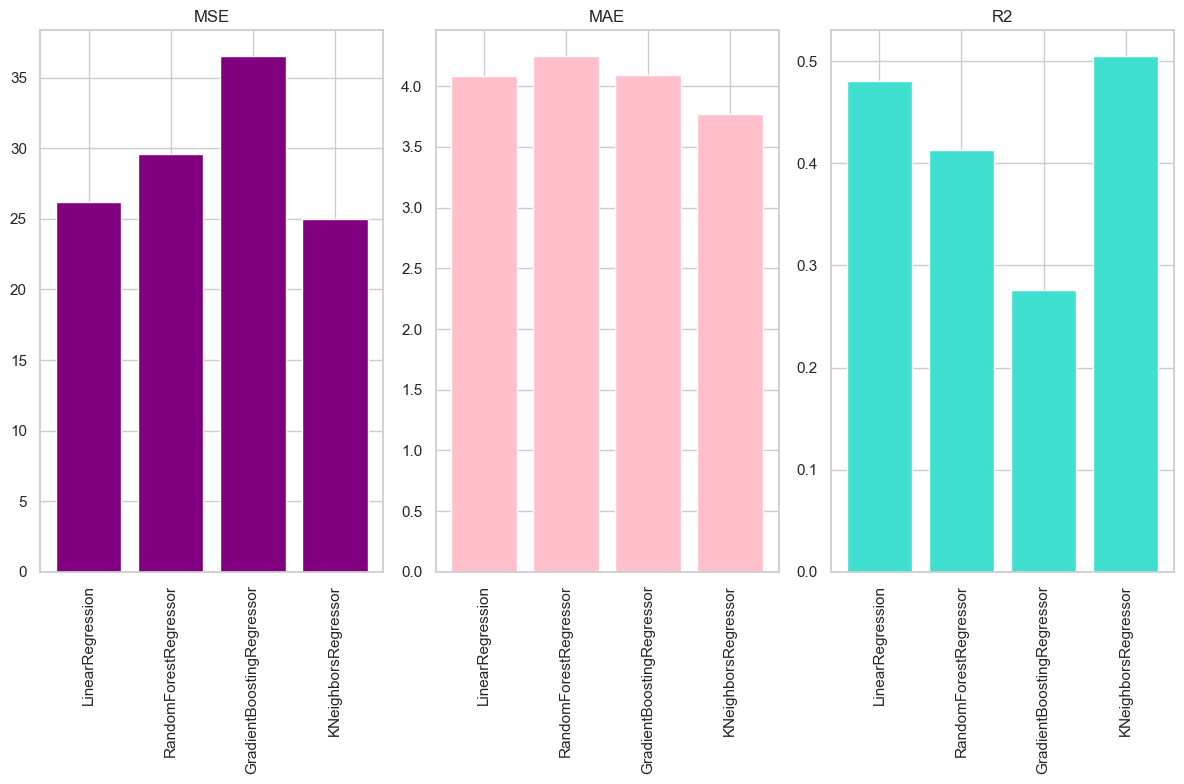

In [67]:
import matplotlib.pyplot as plt

# Plotting accuracy, precision, recall, and AUC scores as bar plots
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].bar(range(len(regressors)), results['MSE'], color='purple')
ax[0].set_title('MSE')
ax[0].set_xticks(range(len(regressors)))
ax[0].set_xticklabels([type(reg).__name__ for reg in regressors], rotation=90)

ax[1].bar(range(len(regressors)), results['MAE'], color='pink')
ax[1].set_title('MAE')
ax[1].set_xticks(range(len(regressors)))
ax[1].set_xticklabels([type(reg).__name__ for reg in regressors], rotation=90)

ax[2].bar(range(len(regressors)), results['R2'], color='turquoise')
ax[2].set_title('R2')
ax[2].set_xticks(range(len(regressors)))
ax[2].set_xticklabels([type(reg).__name__ for reg in regressors], rotation=90)

plt.tight_layout()
plt.show()

## 🦠 Ensemble Models

## 🦠 Hyperparameter Tuning for Filtered Models

### ⭐️ Logistic Regression - Binary

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

y = y_in.to_numpy()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

lr = LogisticRegression(max_iter=100000, random_state=42)

grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(score * 100))



/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past beha

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/pyth

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/pyth

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Test accuracy: 88.89%


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `

### ⭐️ Random Forest - Binary

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

y = y_in.to_numpy()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=42)

# Define the hyperparameters to search
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'max_depth': [3, 5, None],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)

random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)

threshold = 0.3

y_pred_prob = random_search.predict_proba(X_test)

y_pred = (y_pred_prob[:, 1] > threshold).astype(int)

score = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(score * 100))

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Test accuracy: 80.56%


### ⭐️ KNN - Binary

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

y = y_in.to_numpy()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=42)

param_dist = {
    'n_neighbors': np.arange(2, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(5, 55, 5)
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn, param_distributions=param_dist, cv=5, n_iter=50)

random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)

y_pred_prob = random_search.best_estimator_.predict_proba(X_test)[:, 1]
threshold = 0.3  # Set threshold value
y_pred = np.where(y_pred_prob >= threshold, 1, 0)

score = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(score * 100))


Best hyperparameters:  {'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 30, 'algorithm': 'brute'}
Test accuracy: 66.67%


In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y = y_in.to_numpy()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=42)

# Define the base classifiers
lr = LogisticRegression(max_iter=100000)

rf_params = {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

rf = RandomForestClassifier(**rf_params)

knn_params = {'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 30, 'algorithm': 'brute'}

knn = KNeighborsClassifier(**knn_params)

# Define the voting classifier with 'hard' voting
# voting_clf = VotingClassifier(
#     estimators=[('lr', lr), ('rf', rf), ('knn', knn)],
#     voting='hard'
# )
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('knn', knn)],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate the performance of the ensemble model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

cv_acc = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')
overall_acc = np.mean(cv_acc)

print('Ensemble Model (Logistic Regression + Random Forest + KNN)')
print('Precision:', precision)
print('Recall:', recall)
print('AUC:', auc_score)
print('Cross-validated Accuracies:', cv_acc)
print('Overall Accuracy:', overall_acc)


Ensemble Model (Logistic Regression + Random Forest + KNN)
Precision: 0.7647058823529411
Recall: 0.8125
AUC: 0.90625
Cross-validated Accuracies: [0.76470588 0.88235294 0.76470588 0.76470588 0.9375    ]
Overall Accuracy: 0.8227941176470587


### 📍 Threshold Adjustment

In [222]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

# Load your data and split it into training and testing sets

# Fit logistic regression model
logreg_model = LogisticRegression()
logreg_predictions = cross_val_predict(logreg_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Fit random forest model
rf_params = {
    'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': False
}
rf_model = RandomForestClassifier(**rf_params)
rf_predictions = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Fit KNN model
knn_params = {
    'weights': 'uniform', 'n_neighbors': 3, 'leaf_size': 35, 'algorithm': 'auto'
}
knn_model = KNeighborsClassifier(**knn_params)
knn_predictions = cross_val_predict(knn_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Create a list of models and their predictions
models = [(logreg_predictions, "Logistic Regression"), 
          (rf_predictions, "Random Forest"), 
          (knn_predictions, "KNN")]

# Define a list of thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the results
results = []

# Loop through the models and thresholds
for model_predictions, name in models:
    for threshold in thresholds:
        # Predict the labels for the test set using the current threshold
        labels = (model_predictions >= threshold).astype(int)

        # Calculate accuracy, precision, recall, and AUC score for the current threshold
        acc = accuracy_score(y_train, labels)
        prec = precision_score(y_train, labels)
        rec = recall_score(y_train, labels)
        auc = roc_auc_score(y_train, model_predictions)

        # Append the results to the list
        results.append((name, threshold, acc, prec, rec, auc))

# Convert the results list to a pandas dataframe and display it
results_df = pd.DataFrame(results, columns=["Model", "Threshold", "Accuracy", "Precision", "Recall", "AUC"])
# print(results_df)


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [233]:
pd.DataFrame(results_df)

style = results_df.style.background_gradient(subset=['Accuracy', 'Precision', 'Recall'], vmin=0.8)

style

,Model,Threshold,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.100000,0.821429,0.777778,0.875000,0.877841
1,Logistic Regression,0.200000,0.833333,0.795455,0.875000,0.877841
2,Logistic Regression,0.300000,0.845238,0.813953,0.875000,0.877841
3,Logistic Regression,0.400000,0.845238,0.829268,0.850000,0.877841
4,Logistic Regression,0.500000,0.833333,0.825000,0.825000,0.877841
5,Logistic Regression,0.600000,0.833333,0.842105,0.800000,0.877841
6,Logistic Regression,0.700000,0.833333,0.842105,0.800000,0.877841
7,Logistic Regression,0.800000,0.833333,0.842105,0.800000,0.877841
8,Logistic Regression,0.900000,0.821429,0.837838,0.775000,0.877841
9,Random Forest,0.100000,0.607143,0.547945,1.000000,0.960795


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

rf_params = {
    'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': False
}
knn_params = {
    'weights': 'uniform', 'n_neighbors': 3, 'leaf_size': 35, 'algorithm': 'auto'
}

# Initialize the classifiers
knn = KNeighborsClassifier(**knn_params)
lr = LogisticRegression()
rf = RandomForestClassifier(**rf_params)

# Initialize the voting classifier
eclf = VotingClassifier(estimators=[('knn', knn), ('lr', lr), ('rf', rf)], voting='soft')

# Fit the voting classifier using cross-validation
scores = cross_val_score(eclf, X_in, y_in, cv=5)
print("Cross-validation scores:", scores)

# Fit the voting classifier to the training data
eclf.fit(X_train, y_train)

# Predict the classes of the test set using the voting classifier
y_pred = eclf.predict(X_test)

# Calculate the accuracy of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

# create lists for storing evaluation metrics
thresholds = []
accuracies = []
precisions = []
recalls = []
aucs = []

# loop through different threshold values
for threshold in range(1, 10):
    threshold /= 10
    
    # predict class probabilities using the model
    y_pred_prob = eclf.predict_proba(X_test)[:,1]
    
    # convert class probabilities to class predictions using the threshold
    y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
    
    # calculate evaluation metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # append evaluation metrics to lists
    thresholds.append(threshold)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    aucs.append(auc)

# create a dictionary to store the evaluation metrics
metrics_dict = {
    "Threshold": thresholds,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "AUC": aucs
}

# create a pandas dataframe from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# print the dataframe
print(metrics_df)


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docume

Cross-validation scores: [0.91666667 0.83333333 0.79166667 0.70833333 0.75      ]


/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.8888888888888888
   Threshold  Accuracy  Precision  Recall   AUC
0        0.1  0.583333   0.516129  1.0000  0.95
1        0.2  0.666667   0.571429  1.0000  0.95
2        0.3  0.861111   0.823529  0.8750  0.95
3        0.4  0.861111   0.823529  0.8750  0.95
4        0.5  0.888889   0.875000  0.8750  0.95
5        0.6  0.861111   0.866667  0.8125  0.95
6        0.7  0.861111   0.866667  0.8125  0.95
7        0.8  0.805556   1.000000  0.5625  0.95
8        0.9  0.583333   1.000000  0.0625  0.95


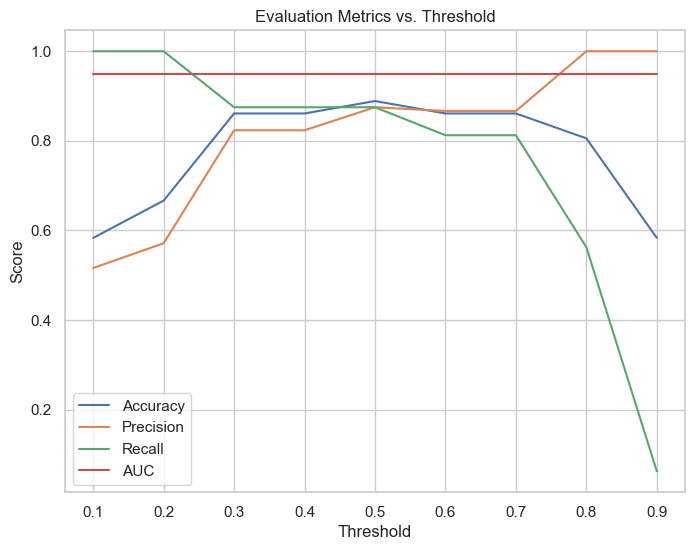

In [77]:
import matplotlib.pyplot as plt

# plot the evaluation metrics against the threshold
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
ax.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
ax.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
ax.plot(metrics_df['Threshold'], metrics_df['AUC'], label='AUC')

ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics vs. Threshold')
ax.legend()

plt.show()


___
## 🧪 Visualizations

## 🦠 Accuracy Checking

In [231]:
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_0_8,pixel_0_9,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
30,0,0,0,0,7,23,22,22,23,21,...,179,178,177,177,184,57,0,0,0,0
53,185,186,188,189,192,189,188,188,187,188,...,182,183,183,184,183,182,181,183,181,180
118,189,189,189,189,189,189,189,189,189,189,...,178,177,179,178,178,178,180,179,178,179
9,186,186,186,186,186,185,186,184,184,186,...,184,183,183,184,184,184,184,183,184,184
33,183,182,182,182,182,181,181,181,182,182,...,168,167,169,169,169,167,168,168,167,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,183,183,183,182,182,181,182,182,182,182,...,165,166,167,166,165,165,165,165,165,166
14,185,185,185,184,185,185,184,184,186,184,...,178,180,179,179,179,179,179,179,180,179
92,184,185,186,185,186,184,185,186,185,184,...,168,169,169,169,169,169,169,169,169,169
51,171,171,175,174,175,176,159,148,141,132,...,189,189,189,189,189,189,189,188,188,188


In [234]:
# Final Model (Individual)

rf_params = {
    'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': False
}
rf = RandomForestClassifier(**rf_params)

rf.fit(X_train, y_train)
y_pred_prob = rf.predict_proba(X_test)[:,1]
y_pred = [1 if prob >= 0.4 else 0 for prob in y_pred_prob]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

metrics_dict = {
    "Threshold": [0.4],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "AUC": [auc]
}

metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)



   Threshold  Accuracy  Precision  Recall       AUC
0        0.4  0.861111   0.789474  0.9375  0.928125


In [237]:
# Final Model (Ensemble)
from sklearn.metrics import roc_curve

y_pred_prob = eclf.predict_proba(X_test)[:,1]
y_pred = [1 if prob >= 0.3 else 0 for prob in y_pred_prob]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

metrics_dict = {
    "Threshold": [0.3],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "AUC": [auc]
}

metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)

   Threshold  Accuracy  Precision  Recall      AUC
0        0.3  0.888889   0.833333  0.9375  0.93125


In [282]:
import joblib

joblib.dump(eclf, '/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/eclf.pkl')

['/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/eclf.pkl']

## 🦠 Confustion Matrix

/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/almgacis/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

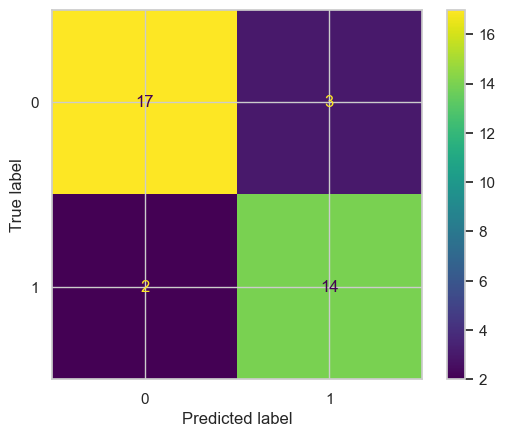

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict


# Generate predicted probabilities for test set using eclf model
eclf_model_prob_test = eclf.predict_proba(X_test)[:,1]

# Apply threshold of 0.3 to eclf model predictions
eclf_model_pred_test = (eclf_model_prob_test >= 0.3).astype(int)

# Generate cross-validated predictions for test set using eclf model
y_test_pred = cross_val_predict(eclf, X_test, y_test, cv=5)

# Display confusion matrix for test set predictions using eclf model and threshold of 0.3
cm = confusion_matrix(y_test, eclf_model_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [214]:
# 0.829268	0.818182	0.857143	

In [243]:
(15+17)/(15+17+3+1) #accuracy

0.8888888888888888

In [244]:
(15)/(15+3) #precision

0.8333333333333334

In [245]:
(15)/(15+1) #recall

0.9375

> minimum number of trained images <p>
> difference of improvement

## 🦠 Precision-Recall Curve

In [246]:
from sklearn.metrics import precision_recall_curve

# predict class probabilities using the model
y_pred_prob = eclf.predict_proba(X_test)[:, 1]

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# find index of threshold closest to 0.4
idx = (np.abs(thresholds - 0.3)).argmin()

# print precision and recall at threshold closest to 0.4
print("Precision at threshold 0.4: {:.3f}".format(precision[idx]))
print("Recall at threshold 0.4: {:.3f}".format(recall[idx]))


Precision at threshold 0.4: 0.789
Recall at threshold 0.4: 0.938


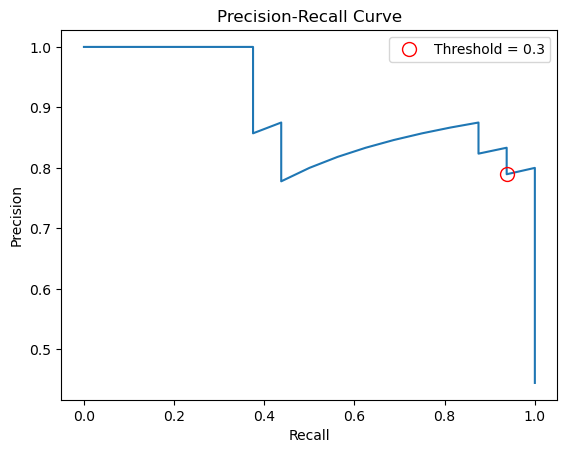

Precision: 0.789, Recall: 0.938


In [248]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute cross-validated class probabilities
# y_pred_prob_cv = cross_val_predict(eclf, X_train, y_train, cv=5, method='predict_proba')[:, 1]
y_pred_prob = eclf.predict_proba(X_test)[:, 1]

# Compute precision and recall values for various threshold values
# precision_cv, recall_cv, thresholds_cv = precision_recall_curve(y_train, y_pred_prob_cv)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Find the index of the threshold closest to 0.4
idx = (np.abs(thresholds - 0.3)).argmin()

# Plot the precision-recall curve with the threshold value of 0.4
plt.plot(recall, precision)
plt.plot(recall[idx], precision[idx], 'o', markersize=10, fillstyle='none', c='r', label='Threshold = 0.3')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print("Precision: {:.3f}, Recall: {:.3f}".format(precision[idx], recall[idx]))

> add thresholds, print highest

In [249]:
#TRAIN SCORES
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_train, eclf_model_pred_train)
print("Accuracy: ", accuracy)

precision = precision_score(y_train, eclf_model_pred_train)
print("Precision: ", precision)

recall = recall_score(y_train, eclf_model_pred_train)
print("Recall: ", recall)

NameError: name 'eclf_model_pred_train' is not defined

In [280]:
#TEST SCORES
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, eclf_model_pred_test)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, eclf_model_pred_test)
print("Precision: ", precision)

recall = recall_score(y_test, eclf_model_pred_test)
print("Recall: ", recall)

Accuracy:  0.8888888888888888
Precision:  0.8333333333333334
Recall:  0.9375


## 🦠 ROC Curve

In [251]:
if idx_for_90_precision < len(thresholds):
    threshold_for_90_precision = thresholds[idx_for_90_precision]
else:
    threshold_for_90_precision = thresholds[-1]


NameError: name 'idx_for_90_precision' is not defined

In [410]:
print(len(thresholds))

36


## 🦠 AUC Score

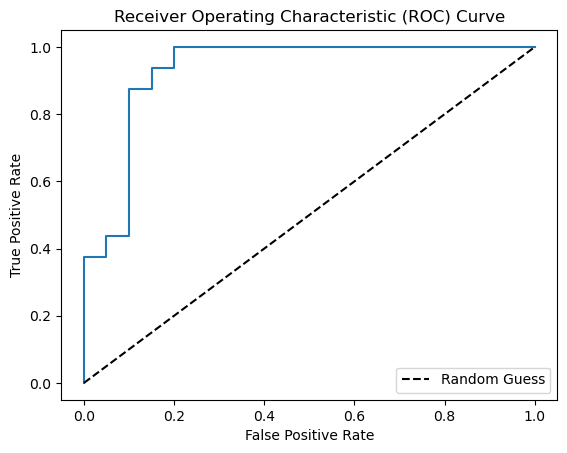

AUC Score: 0.93125


In [252]:
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities and get false positive rate, true positive rate, and thresholds
y_pred_prob = eclf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate AUC score
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)


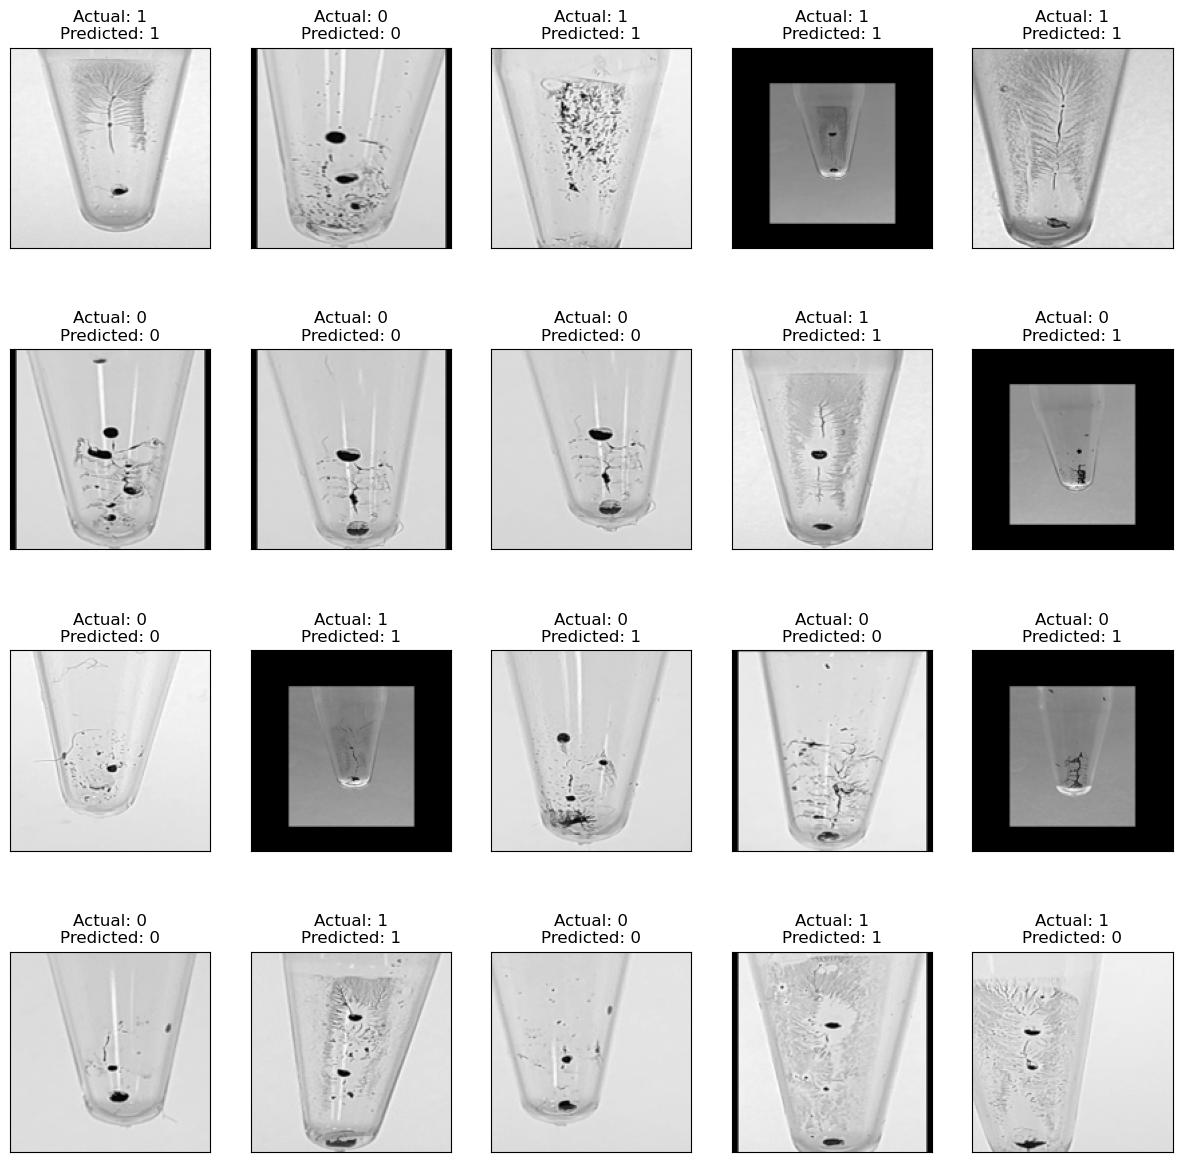

In [253]:
import matplotlib.pyplot as plt

X_test_val = X_test.values
X_test_sample = X_test_val.reshape(-1, 150, 150)
X_test_sampled = X_test_sample.astype('float32') / 255.0

fig1, axs1 = plt.subplots(4,5, figsize=(15, 15))

for i, ax in enumerate(axs1.flatten()):
    ax.imshow(X_test_sampled[i], cmap='gray')
    ax.set_title(f"Actual: {y_test[i]}\nPredicted: {eclf_model_pred_test[i]}")
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

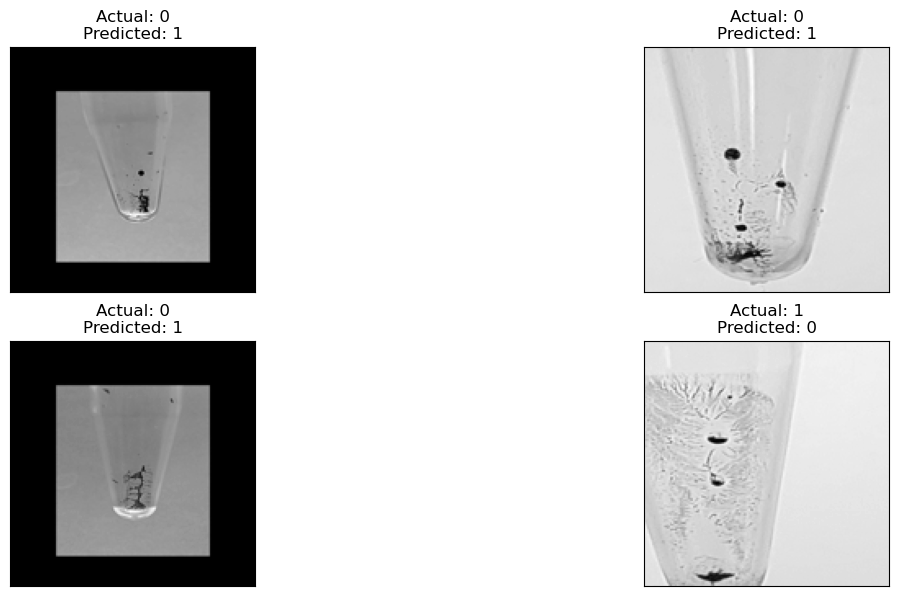

In [255]:
import numpy as np
import matplotlib.pyplot as plt

mask = y_test != eclf_model_pred_test

X_test_masked = X_test[mask]
X_test_masked2 = X_test_masked.values.reshape(-1, 150, 150)
X_test_masked3 = X_test_masked2.astype('float32') / 255.0

fig2, axs2 = plt.subplots(2, 2, figsize=(15, 7))

for i, ax in enumerate(axs2.flatten()):
    ax.imshow(X_test_masked3[i], cmap='gray')
    ax.set_title(f"Actual: {y_test[mask][i]}\nPredicted: {eclf_model_pred_test[mask][i]}")
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

In [412]:
mask = y_test != knn_model_pred_test

X_test_masked = X_test[mask]
X_test_masked

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_0_8,pixel_0_9,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
128,0,0,0,0,7,23,23,23,23,22,...,181,181,184,185,190,58,0,0,0,0
27,0,0,0,0,7,23,23,23,23,22,...,184,185,185,185,189,59,0,0,0,0
119,173,174,174,174,175,174,174,175,176,176,...,169,169,170,169,170,171,170,170,170,170
80,0,0,0,0,7,23,22,23,22,21,...,177,178,176,178,182,55,0,0,0,0
83,192,189,164,146,148,149,139,132,131,130,...,204,205,205,205,205,205,206,205,206,206
68,180,178,178,181,178,178,179,178,176,177,...,191,189,190,191,190,190,190,189,190,189


In [415]:
indices = [128, 27, 119, 80, 83, 68]
full_data.iloc[indices]

,file_name,Cells,Label,Type,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
128,file_1,10000000,1,X,0,0,0,0,7,23,...,181,181,184,185,190,58,0,0,0,0
27,file_28,0,0,X,0,0,0,0,7,23,...,184,185,185,185,189,59,0,0,0,0
119,file_87,100000,1,X,173,174,174,174,175,174,...,169,169,170,169,170,171,170,170,170,170
80,file_18,0,0,X,0,0,0,0,7,23,...,177,178,176,178,182,55,0,0,0,0
83,file_125,0,0,X,192,189,164,146,148,149,...,204,205,205,205,205,205,206,205,206,206
68,file_123,0,0,X,180,178,178,181,178,178,...,191,189,190,191,190,190,190,189,190,189


## 🦠 Real Test Data

In [327]:
import os
import numpy as np
import pandas as pd
from PIL import Image

df_test = pd.DataFrame(columns=['file_name', 'pixels'])

path = '/Users/almgacis/Documents/MSU/CMSE_890/Final_Project/Test'
# path = '/Users/almgacis/Documents/MSU/CMSE_890/Final_Project/Test_Cropped'
for i, file_name in enumerate(os.listdir(path)):
    
    if not file_name.endswith('.jpeg'):
        continue
    
    image_path = os.path.join(path, file_name)
    try:
        image = Image.open(image_path)
    except:
        print(f"Failed to open image {image_path}")
        continue


    if hasattr(image, '_getexif'):  # only for JPEGs
        exifdata = image._getexif()
        if exifdata is not None:
            orientation = exifdata.get(274, None)
            if orientation is not None:
                if orientation == 3:
                    image = image.rotate(180, expand=True)
                elif orientation == 6:
                    image = image.rotate(270, expand=True)
                elif orientation == 8:
                    image = image.rotate(90, expand=True)

                    
    width, height = image.size
    if width > height:
        left = (width - height) / 2 + (height - 100) / 2
        upper = (height - 500) / 2
        right = (width + height) / 2 - (height - 100) / 2
        lower = (height + 500) / 2
    else:
        left = (width - 100) / 2
        upper = (height - width) / 2 + (width - 500) / 2
        right = (width + 100) / 2
        lower = (height + width) / 2 - (width - 500) / 2
    cropped_image = image.crop((left, upper, right, lower))
#     if width > height:
#         left = (width - height) / 2 + (height - 300) / 2
#         upper = (height - 800) / 2
#         right = (width + height) / 2 - (height - 300) / 2
#         lower = (height + 800) / 2
#     else:
#         left = (width - 300) / 2
#         upper = (height - width) / 2 + (width - 800) / 2
#         right = (width + 300) / 2
#         lower = (height + width) / 2 - (width - 800) / 2
#     cropped_image = image.crop((left, upper, right, lower))


    resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
    flattened_image = np.array(resized_image).ravel()
    df_test.loc[i, 'file_name'] = file_name
    df_test.loc[i, 'pixels'] = flattened_image

df_test['file_name'] = df_test['file_name'].str.replace('.jpeg', '')
# df_test['file_name'] = 'file_' + df_test['file_name'].astype(str)

<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is 

<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is 

<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is 

<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is 

<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  resized_image = cropped_image.resize((150, 150), resample=Image.BOX).convert('L')
<ipython-input-327-85e7c8fe36a5>:61: DeprecationWarning: BOX is 

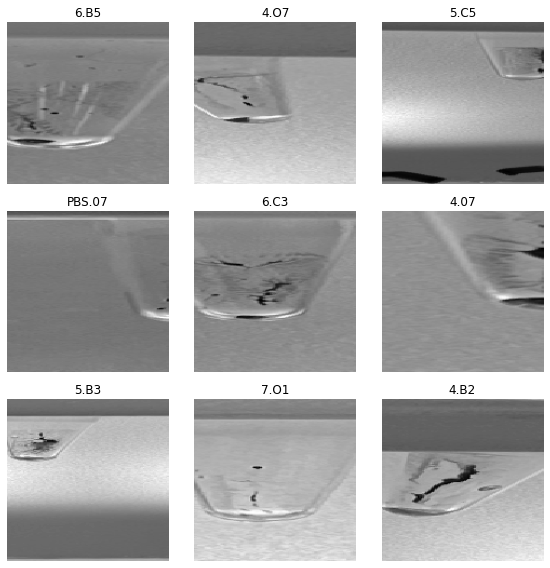

In [328]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image_array = df_test.loc[i, 'pixels'].reshape((150, 150))
    ax.imshow(image_array, cmap='gray')
    ax.set_title(df_test.loc[i, 'file_name'])
    ax.axis('off')
plt.tight_layout()
plt.show()


In [329]:
columns_test = [f'pixel_{i}_{j}' for i in range(150) for j in range(150)]

image_df_test = pd.DataFrame(index=range(df_test.shape[0]), columns=columns_test)

for i, row in df_test.iterrows():
    image_df_test.loc[i, :] = row['pixels']

image_data_test = pd.merge(df_test, image_df_test, left_index=True, right_index=True)
image_data_test.drop(columns=['pixels'], inplace=True)
image_data_test

,file_name,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_0_8,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
0,6.B5,118,118,118,120,118,118,117,117,117,...,137,137,135,135,135,135,135,134,134,134
1,4.O7,111,111,111,110,110,110,110,109,109,...,208,210,208,208,207,212,212,212,211,211
2,5.C5,92,91,91,93,93,93,92,92,92,...,129,129,129,129,129,127,127,128,128,128
3,PBS.07,100,99,99,102,104,104,104,101,101,...,138,138,139,139,139,138,138,137,137,137
4,6.C3,124,123,123,124,125,125,125,124,124,...,143,142,147,147,155,158,158,153,151,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,7.C1,96,96,96,98,97,97,96,97,97,...,231,235,232,232,226,229,229,226,230,230
209,8.A4,138,137,137,137,134,134,132,132,132,...,129,128,126,126,126,129,129,130,127,127
210,PBS.B1,101,99,99,98,100,100,99,97,97,...,131,129,130,130,132,134,134,132,131,131
211,5.O5,99,98,98,100,100,100,100,99,99,...,147,147,146,146,145,144,144,147,148,148


In [330]:
X_test_in = image_data_test.iloc[:, 1:]
X_test_in.shape

(213, 22500)

In [331]:
X_test_in

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_0_8,pixel_0_9,...,pixel_149_140,pixel_149_141,pixel_149_142,pixel_149_143,pixel_149_144,pixel_149_145,pixel_149_146,pixel_149_147,pixel_149_148,pixel_149_149
0,118,118,118,120,118,118,117,117,117,119,...,137,137,135,135,135,135,135,134,134,134
1,111,111,111,110,110,110,110,109,109,109,...,208,210,208,208,207,212,212,212,211,211
2,92,91,91,93,93,93,92,92,92,92,...,129,129,129,129,129,127,127,128,128,128
3,100,99,99,102,104,104,104,101,101,101,...,138,138,139,139,139,138,138,137,137,137
4,124,123,123,124,125,125,125,124,124,123,...,143,142,147,147,155,158,158,153,151,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,96,96,96,98,97,97,96,97,97,97,...,231,235,232,232,226,229,229,226,230,230
209,138,137,137,137,134,134,132,132,132,135,...,129,128,126,126,126,129,129,130,127,127
210,101,99,99,98,100,100,99,97,97,98,...,131,129,130,130,132,134,134,132,131,131
211,99,98,98,100,100,100,100,99,99,100,...,147,147,146,146,145,144,144,147,148,148


In [332]:
probas = eclf.predict_proba(X_test_in)
threshold = 0.4
y_pred_in = (probas[:, 1] >= threshold).astype(int)
y_pred_in

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

IndexError: index 2 is out of bounds for axis 0 with size 2

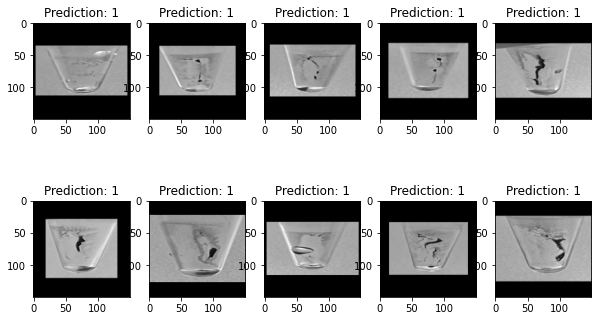

In [320]:
import numpy as np
import matplotlib.pyplot as plt

X_test_in['predicted_label'] = y_pred_in

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
for i, (idx, row) in enumerate(X_test_in.iterrows()):
    image = np.array(row.drop('predicted_label')).reshape((150, 150)).astype(float)
    label = row['predicted_label']
    axes[i // 5, i % 5].imshow(image, cmap='gray')
    axes[i // 5, i % 5].set_title(f"Prediction: {label}")
plt.show()



In [278]:
X_test_in.shape

(213, 22501)

In [337]:
image_data_test['class'] = y_pred_in
first_last_cols = image_data_test.iloc[:, [0, -1]]
first_last_cols

,file_name,class
0,6.B5,1
1,4.O7,1
2,5.C5,1
3,PBS.07,1
4,6.C3,1
...,...,...
208,7.C1,1
209,8.A4,1
210,PBS.B1,1
211,5.O5,1


In [338]:
first_last_cols.to_csv("/Users/almgacis/Documents/MSU/CMSE_890/Final_Project/test_predicted.csv", index=False)

# 🧪 Tensorflow / Keras

In [3]:
import os
import numpy as np
import pandas as pd
from PIL import Image

df = pd.DataFrame(columns=['file_name', 'pixels'])

path = '/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/All/imgs'
# path = '/Users/almgacis/Documents/MSU/CMSE_890/Final_Project/Cropped 1/imgs_uncropped'
for i, file_name in enumerate(os.listdir(path)):
    
    if not file_name.endswith('.jpg'):
        continue
    
    image_path = os.path.join(path, file_name)
    try:
        image = Image.open(image_path)
    except:
        print(f"Failed to open image {image_path}")
        continue


    if hasattr(image, '_getexif'):  # only for JPEGs
        exifdata = image._getexif()
        if exifdata is not None:
            orientation = exifdata.get(274, None)
            if orientation is not None:
                if orientation == 3:
                    image = image.rotate(180, expand=True)
                elif orientation == 6:
                    image = image.rotate(270, expand=True)
                elif orientation == 8:
                    image = image.rotate(90, expand=True)

                    
    width, height = image.size
    if width > height:
        left = (width - height) / 2 + (height - 800) / 2
        upper = (height - 1350) / 2
        right = (width + height) / 2 - (height - 800) / 2
        lower = (height + 1200) / 2
    else:
        left = (width - 800) / 2
        upper = (height - width) / 2 + (width - 1350) / 2
        right = (width + 800) / 2
        lower = (height + width) / 2 - (width - 1200) / 2
    cropped_image = image.crop((left, upper, right, lower))


    resized_image = cropped_image.resize((150, 150)).convert('L')
    flattened_image = np.array(resized_image).ravel()
    df.loc[i, 'file_name'] = file_name
    df.loc[i, 'pixels'] = flattened_image

df['file_name'] = df['file_name'].str.replace('.jpg', '')
df['file_name'] = 'file_' + df['file_name'].astype(str)

/var/folders/0j/9q772dp50970050p1cw28jy00000gn/T/ipykernel_66082/4136439539.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  df['file_name'] = df['file_name'].str.replace('.jpg', '')


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Extract the pixel values from the 'pixels' column of the DataFrame
X = np.stack(df['pixels'].values)

# Reshape the pixel values into a 4D tensor of shape (num_samples, height, width, channels)
height, width = resized_image.size
channels = 1
X = X.reshape(-1, height, width, channels)

# Normalize the pixel values to be between 0 and 1
X = X.astype("float32") / 255.0

In [5]:
atts = pd.read_csv('/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/attributes_5andup.csv')
df2 = pd.merge(df, atts, on='file_name')
y = df2['Label']

### 🦠 Data Augmentation

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

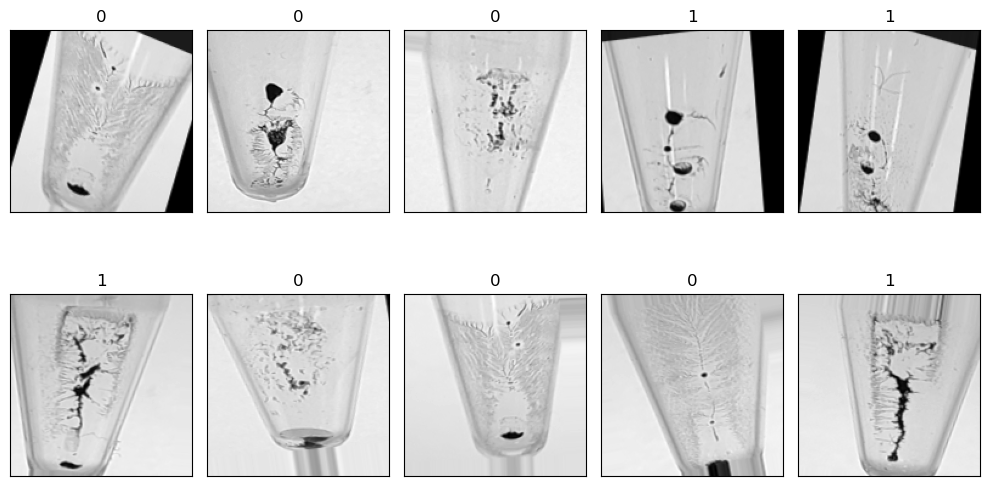

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator with the desired augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Define the number of augmented images to generate per input image
num_augmented_images = 10
X_train = X_train.reshape(-1, height, width, channels)
datagen.fit(X_train)
augmented_images = []
for img in X_train:
    img = img.reshape((1,) + img.shape)
    aug_iter = datagen.flow(img)
    for i in range(num_augmented_images):
        augmented_images.append(aug_iter.next()[0])

# concatenate the original and augmented data
X_augmented = np.concatenate((X_train, augmented_images))
y_augmented = np.tile(y_train, num_augmented_images + 1)

# print 10 random augmented images with their labels
import matplotlib.pyplot as plt
import random

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    index = random.randint(0, len(X_augmented) - 1)
    ax.imshow(X_augmented[index], cmap='gray')
    ax.set_title(str(y_augmented[index]))
plt.tight_layout()
plt.show()



### 🦠 Modeling - CNN

In [10]:
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(150, 150, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
        tf.keras.metrics.Recall(),
     tf.keras.metrics.Precision()])

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
earlystop_callback = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_augmented,
    y_augmented,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[earlystop_callback]
)


Epoch 1/20
33/33 [==============================] - 4s 99ms/step - loss: 2.0052 - accuracy: 0.4602 - recall_55: 0.5059 - precision_55: 0.4444 - val_loss: 0.7400 - val_accuracy: 0.4167 - val_recall_55: 1.0000 - val_precision_55: 0.4167
Epoch 2/20
33/33 [==============================] - 3s 87ms/step - loss: 0.6941 - accuracy: 0.5398 - recall_55: 0.5119 - precision_55: 0.5201 - val_loss: 0.6890 - val_accuracy: 0.5833 - val_recall_55: 0.6000 - val_precision_55: 0.5000
Epoch 3/20
33/33 [==============================] - 3s 86ms/step - loss: 0.6729 - accuracy: 0.5777 - recall_55: 0.4802 - precision_55: 0.5704 - val_loss: 0.6503 - val_accuracy: 0.6250 - val_recall_55: 0.3000 - val_precision_55: 0.6000
Epoch 4/20
33/33 [==============================] - 3s 84ms/step - loss: 0.6497 - accuracy: 0.6089 - recall_55: 0.5158 - precision_55: 0.6084 - val_loss: 0.6753 - val_accuracy: 0.6250 - val_recall_55: 0.7000 - val_precision_55: 0.5385
Epoch 5/20
33/33 [==============================] - 3s 84ms/

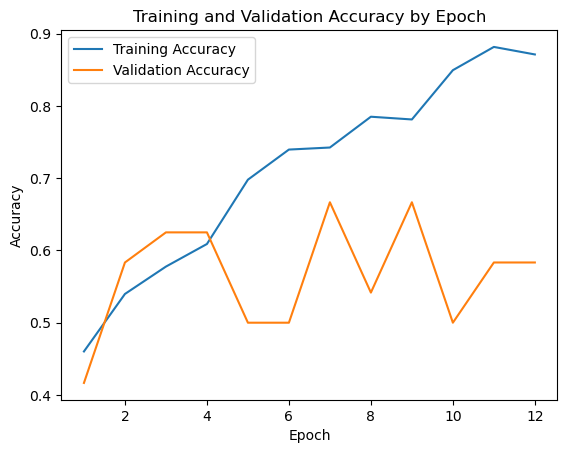

In [12]:
import matplotlib.pyplot as plt

# Extract the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Generate a plot of the training and validation accuracy over the epochs
plt.plot(range(1, len(train_acc)+1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc)+1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 🦠 Hyperparameter Tuning

In [112]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a function to create the model
def create_model(learning_rate=1e-3, decay=1e-6, filters=32, kernel_size=3, units=64):
    model = keras.Sequential([
        layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(150, 150, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(units=units, activation='relu'),
        layers.Dense(units=1, activation='sigmoid')
    ])
    optimizer = keras.optimizers.Adam(lr=learning_rate, decay=decay)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision()])
    return model

# Create the KerasClassifier object for use in RandomizedSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
param_distributions = {
    'learning_rate': [1e-4, 1e-3, 1e-2],
    'decay': [1e-6, 1e-5, 1e-4],
    'filters': [16, 32, 64, 128],
    'kernel_size': [3, 5],
    'units': [32, 64, 128, 256]
}

# Define the number of random searches to perform
n_iter = 10

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=n_iter, cv=3)

# Fit the model with the training data
history = random_search.fit(
    X_augmented,
    y_augmented,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Print the best hyperparameters and their associated score
print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


/var/folders/0j/9q772dp50970050p1cw28jy00000gn/T/ipykernel_43226/1263675121.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best hyperparameters:  {'units': 256, 'learning_rate': 0.001, 'kernel_size': 5, 'filters': 32, 'decay': 0.0001}
Best score:  0.5397727290789286


In [13]:
test_results = model.evaluate(X_val, y_val)
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i] + ': ' + str(test_results[i]))

1/1 [==============================] - 0s 106ms/step - loss: 0.6426 - accuracy: 0.6667 - recall_55: 0.4000 - precision_55: 0.6667
loss: 0.6425824165344238
accuracy: 0.6666666865348816
recall_55: 0.4000000059604645
precision_55: 0.6666666865348816


In [14]:
# Generate predicted probabilities for the validation set
y_val_pred_prob = model.predict(X_val)

# Convert probabilities into binary predictions based on threshold of 0.3
y_val_pred = (y_val_pred_prob >= 0.4).astype(int)

# Evaluate the model's performance using the new binary predictions
new_test_results = model.evaluate(X_val, y_val_pred)
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i] + ': ' + str(new_test_results[i]))


1/1 [==============================] - 0s 44ms/step - loss: 0.3956 - accuracy: 0.8750 - recall_55: 0.6667 - precision_55: 1.0000
loss: 0.39557716250419617
accuracy: 0.875
recall_55: 0.6666666865348816
precision_55: 1.0


In [178]:
#Save the highest model:
# loss: 0.26003190875053406
# accuracy: 0.9583333134651184
# recall_42: 0.9411764740943909
# precision_42: 1.0
    
model.save('/Users/almgacis/Documents/OneDriveMSU/MSU/CMSE_890/Final_Project/my_model.h5')

import os
from tensorflow import keras

# get the absolute path to the saved model
model_path = os.path.abspath("my_model.h5")

# load the saved model
loaded_model = keras.models.load_model(model_path)

In [179]:
loaded_model

In [ ]:
#For new unseen data
# y_pred = model.predict(X_new_data)

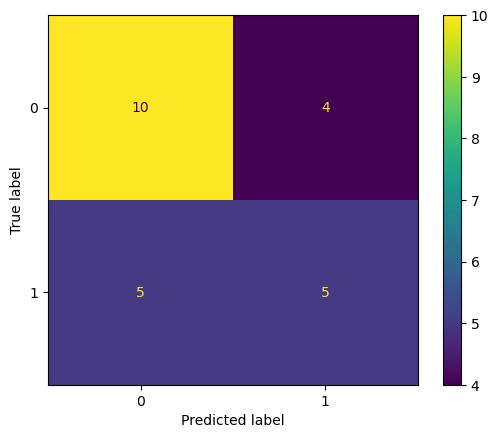

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_val_pred = (y_val_pred_prob >= 0.4).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
